In [10]:
import torch
from torch import nn
#from torchvision.datasets import MNIST
#from torchvision import transforms
from torch.utils.data import TensorDataset, DataLoader
import pytorch_lightning as pl
import matplotlib.pyplot as plt

cpu_cores = 4

En Lightning se necesitan 3 cosas:
1. El módulo Lightning
2. Definir el conjunto de datos
3. Correr entrenamiento

### Módulo

In [11]:
class Regressor(pl.LightningModule):

    def __init__(self, mid_size):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(1, mid_size),
            nn.ReLU(),
            nn.Linear(mid_size, mid_size),
            nn.ReLU(),
            nn.Linear(mid_size, 1))

    def forward(self, x):
        return self.model(x)

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.parameters(), lr=3e-4)
        return optimizer

    def training_step(self, batch, batch_idx):
        point, target = batch
        pred = self.model(point)
        criterion = nn.MSELoss()
        loss = criterion(pred, target)
        self.log('train_loss', loss)
        return loss

    #def validation_step(self, point, target):

## Conjunto de datos

In [12]:
n_samples=10
def f(x): return 2*x#0.4*x**3 - 0.8*x**2 + 2*x + 10
#x = torch.linspace(0, 1, n_samples).view(-1,1)
x = torch.rand(n_samples, 1)
y = f(x)
dataset = TensorDataset(x, y)
train_loader = DataLoader(dataset, batch_size=2, shuffle=True,
                          num_workers=cpu_cores)

## Entrenamiento

In [13]:
model = Regressor(mid_size=10)
trainer = pl.Trainer(max_epochs=1000)
trainer.fit(model, train_loader)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores

  | Name  | Type       | Params
-------------------------------------
0 | model | Sequential | 141   
-------------------------------------
141       Trainable params
0         Non-trainable params
141       Total params
0.001     Total estimated model params size (MB)


Epoch 999: 100%|██████████| 5/5 [00:00<00:00, 35.61it/s, loss=1.32e-05, v_num=9]


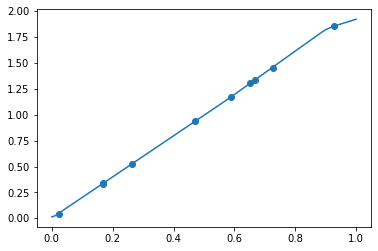

In [14]:
x_plot = torch.linspace(0, 1).view(-1,1)
with torch.no_grad():
    pred = model(x_plot)
plt.scatter(x, y)
plt.plot(x_plot, pred)